# Predicting Heart Disease using Machine Learning

In this project we will test multiple Machine Learning models to predict whether or not a person has heart disease by taking into account various patient characteristics. 

The process will look like this:

* **Exploratory Data Analysis (EDA)** 
* **Model Training** 
* **Model Evaluation** 
* **Model Comparison** 
* **Model Fine-tuning** 
* **Feature Importance** 
* **Cross-validation** 
* **Reporting** 

We will be using Pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling.


In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things). 

This is because we're going to be using a number of differnet **features** (pieces of information) about a person to predict whether they have heart disease or not.

In a statement,

> Given a patient's clinical data, can we predict whether or not they have heart disease?

## Data and Features

The original data came from the [Cleveland database](https://archive.ics.uci.edu/ml/datasets/heart+Disease) from UCI Machine Learning Repository.

Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).

The original database contains 76 attributes, but here only 14 attributes will be used. The independent variables are a patients different medical attributes and the dependent variable is whether or not they have heart disease.

### Heart Disease Data Dictionary

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years 
2. sex - (1 = male; 0 = female) 
3. cp - chest pain type 
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
    * anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl 
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        - can range from mild symptoms to severe problems
        - signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        - Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved 
9. exang - exercise induced angina (1 = yes; 0 = no) 
10. oldpeak - ST depression induced by exercise relative to rest 
    * looks at stress of heart during excercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy 
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising 
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Importing Libraries

We will be using the following Python libraries:  

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Required to render plots in notebook
%matplotlib inline 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

Let us load the data

In [2]:
# Reading the data
df = pd.read_csv("Heart Disease Classification Dataset.csv")
df.shape # (rows, columns)

(303, 15)

## Exploratory Data Analysis 

In [3]:
# Viewing the data to ensure its is properly loaded
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


Converting the target lable to numeric value.

In [4]:
df['new_target'] = np.where(df['target']=='yes', 1, 0)

In [5]:
df = df.drop("target", axis=1)

In [6]:
df.rename(columns={'new_target':'target'}, inplace=True)

We will follow the same steos for converting the sex column to numeric value as well.

In [7]:
df['new_sex'] = np.where(df['sex']=='male', 1, 0)

In [8]:
df = df.drop("sex", axis=1)

In [9]:
df.rename(columns={'new_sex':'sex'}, inplace=True)

In [10]:
df = df.drop('Unnamed: 0', axis = 1)

In [11]:
# Top 10
df.head(10)

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1,0
5,57,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1,1
6,56,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,1,0
7,44,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,1,1
8,52,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,1,1
9,57,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,1,1


In [12]:
# Counting positive (1) and negative (0) samples
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Since these two values are close to even, our target column can be considered balanced. 

In [13]:
# In percentages
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

Let's plot a bar chart of our target class. 

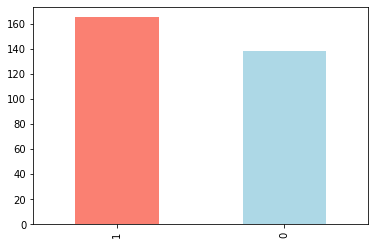

In [14]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

Let us display a quick summary of our data. We see that there are no missing values and all columns are numerical.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trestbps  299 non-null    float64
 3   chol      302 non-null    float64
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   298 non-null    float64
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
 13  sex       303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


We can also view summary statistics with respect to our data.

In [16]:
df.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
count,303.000000,303.000000,299.000000,302.000000,303.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.683168
std,9.082101,1.032052,17.629032,51.908285,0.356198,0.525860,22.563687,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.466011
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,1.000000
75%,61.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


### Heart Disease Frequency according to Gender

If you want to compare two columns to each other, you can use the function `pd.crosstab(column_1, column_2)`. 

Let us try to gain some intuition about how your independent variables interact with your dependent variables.
To start, let's compare our target column with the sex column. 

For the target column, heart disease present = 1, no heart disease = 0. For sex, male = 1, female =0.

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Our data has 207 male and 96 female patients.

In [18]:
# Comparing target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


From this, let us infer our baseline performance.

Since 72 out of 100 women have a postive value of heart disease being present, we might infer that if the participant is a woman, there's a 75% chance she has heart disease.

Similarly, there's about 200 men in our data with around half indicating a presence of heart disease. So we might predict, if the participant is male, 50% of the time they will have heart disease.

Averaging these two values, we can assume, based on no other parameters, if there's a person, there's a 62.5% chance they have heart disease.

Let us try to improve upon this with different machine learning models.

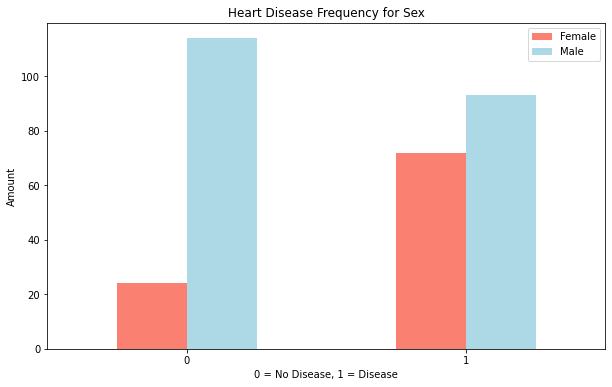

In [19]:
# Creating a plot to compare sex and target variable
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

# Adding labels and attributes
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### Heart Disease on the basis of Age and Maximum Heart Rate

Let's create a scatter plot with age, and maximum heart rate to compare it with out target variable (existence of heart disease).

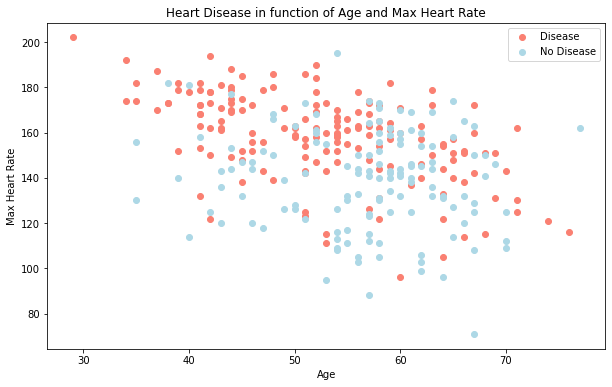

In [20]:
plt.figure(figsize=(10,6))

# Positve samples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Nnegative samples
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Adding labels
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

From the above graph, we can infer that the younger people have a higher maximum heart rate and there is somewhat lower chance of heart disease in older people

Overall, this doesn't tell us much so let us dig deeper by plotting the age distribution.

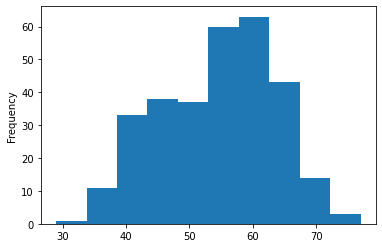

In [21]:
# Histogram of age
df.age.plot.hist();

We can see it's slightly right skewed, which is also reflected in our scatter plot.

### Heart Disease Frequency per Chest Pain Type

Let's try another independent variable: chest pain.


In [22]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


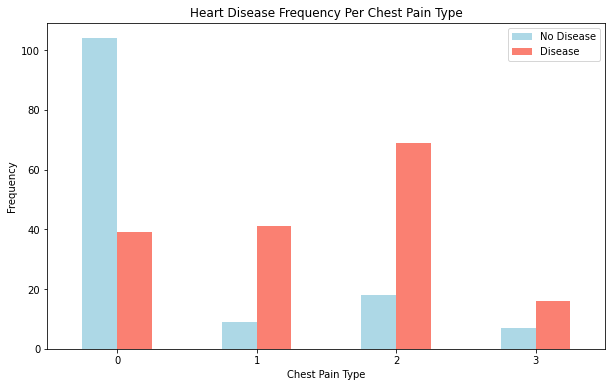

In [23]:
# Crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

This tells us that even though type 1 pain is not related to the heart, it still has a significant number of patients that have heart disease, which is rather interesting.

### Measuring Correlation Between the Independent Variables

This will help us get an idea of which independent variables may or may contribute to our target variable.

In [24]:
corr_matrix = df.corr()
corr_matrix 

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
age,1.000000,-0.068653,0.279570,0.213465,0.121308,-0.116211,-0.396302,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439,-0.098447
cp,-0.068653,1.000000,0.048142,-0.078008,0.094444,0.044421,0.301567,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798,-0.049353
trestbps,0.279570,0.048142,1.000000,0.127278,0.175885,-0.110966,-0.029729,0.070183,0.193827,-0.121380,0.098499,0.060437,-0.142035,-0.064347
chol,0.213465,-0.078008,0.127278,1.000000,0.012865,-0.150330,-0.022939,0.066362,0.053098,-0.003027,0.070807,0.098328,-0.086563,-0.197387
fbs,0.121308,0.094444,0.175885,0.012865,1.000000,-0.084189,0.001599,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046,0.045032
restecg,-0.116211,0.044421,-0.110966,-0.150330,-0.084189,1.000000,0.037393,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230,-0.058196
thalach,-0.396302,0.301567,-0.029729,-0.022939,0.001599,0.037393,1.000000,-0.396211,-0.346806,0.380764,-0.208967,-0.106621,0.413252,-0.051491
exang,0.096801,-0.394280,0.070183,0.066362,0.025665,-0.070733,-0.396211,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757,0.141664
oldpeak,0.210013,-0.149230,0.193827,0.053098,0.005747,-0.058770,-0.346806,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696,0.096093
slope,-0.168814,0.119717,-0.121380,-0.003027,-0.059894,0.093045,0.380764,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877,-0.030711


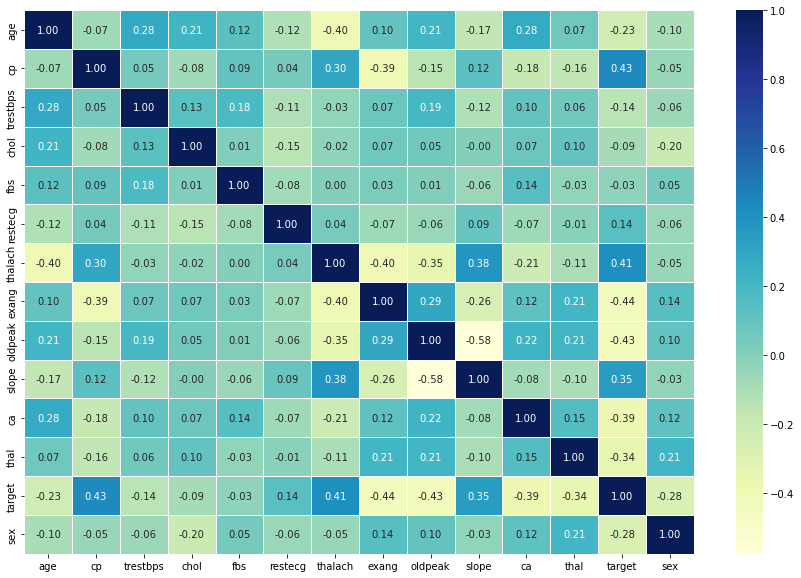

In [25]:
# Adding better visuals
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation.

## Data Modeling

Before we start training models, we have to ensure our data is ready i.e: it is clean.

In [26]:
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1,1
4,57,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1,0


Let us check for null values.

In [27]:
df.isnull().sum()

age         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
sex         0
dtype: int64

Since there are very few, we can safely remove these rows.

In [28]:
df.dropna(axis = 0, inplace = True)

By checking again, we see that all columns are now clean. 

In [29]:
df.isnull().sum()

age         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
sex         0
dtype: int64

Let us get our target variable in a separate dataframe.

In [30]:
# Independent variables
X = df.drop("target", axis=1)

# Target variable
y = df["target"]

Let's see our new variables.

In [31]:
X.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex
0,63,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,0
3,56,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
5,57,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,1


In [32]:
y

0      1
1      1
2      1
3      1
5      1
      ..
296    0
298    0
299    0
300    0
302    0
Name: target, Length: 293, dtype: int64

### Splitting Dataset into Training and Testing

In [33]:
# Random seed for reproducibility
np.random.seed(100)

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.3) # percentage of data to use for test set

In [34]:
X_train.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex
204,62,0,160.0,164.0,0,0,145.0,0,6.2,0,3,3,0
214,56,0,125.0,249.0,1,0,144.0,1,1.2,1,1,2,1
277,57,1,124.0,261.0,0,1,141.0,0,0.3,2,0,3,1
203,68,2,180.0,274.0,1,0,150.0,1,1.6,1,0,3,1
122,41,2,112.0,268.0,0,0,172.0,1,0.0,2,0,2,0


In [35]:
y_train, len(y_train)

(204    0
 214    0
 277    0
 203    0
 122    1
       ..
 69     1
 56     1
 82     1
 288    0
 9      1
 Name: target, Length: 205, dtype: int64,
 205)

In [36]:
X_test.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex
137,62,1,128.0,208.0,1,0,140.0,0,0.0,2,0,2,1
224,54,0,110.0,239.0,0,1,126.0,1,2.8,1,1,3,1
232,55,0,160.0,289.0,0,0,145.0,1,0.8,1,1,3,1
29,53,2,130.0,197.0,1,0,152.0,0,1.2,0,0,2,1
124,39,2,94.0,199.0,0,1,179.0,0,0.0,2,0,2,0


In [37]:
y_test, len(y_test)

(137    1
 224    0
 232    0
 29     1
 124    1
       ..
 231    0
 31     1
 295    0
 132    1
 3      1
 Name: target, Length: 88, dtype: int64,
 88)

### ML Models choices

We will be using the following and comparing their performance.

1. Logistic Regression
2. K-Nearest Neighbors 
3. RandomForest

Our dataset is relatively small, so it is easier to experiment and find which model performs best.

The Scikit-Learn library use the same functions for models, we can create a function to fit and evaluate our models. We can add our models to a dictionary to loop through them. This would be faster than writing out separate chunks of code for each model. 


In [38]:
# Creating dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Creating function to fit and score
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    X_train : training data
    X_test : testing data
    y_train : training data labels
    y_test : test data labels
    """
    # Random seed for reproducible results
    np.random.seed(100)
    # List to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [39]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6022727272727273,
 'Logistic Regression': 0.8295454545454546,
 'Random Forest': 0.8409090909090909}

Done! Now let's compare them using plots.

## Model Comparison

Since our models scores are saved in a dictionary, to plot them we first convert them to a dataframe.

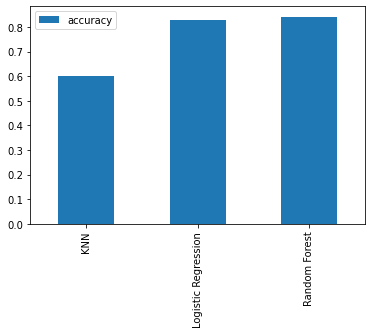

In [40]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

The Logistic Regression model is giving us the highest accuracy.

## Cross-validation and Hyperparameter Tuning

We will be using K-fold cross validation to tune the hyperparameters of some of our models and then evaluate them. We will also compare metrics like ROC, precisio, recall and F1 score.

### Tuning K-Nearest Neighbors Classifier

In KNN, the default value of k is 5. We will run the model with different values of k and compare performance to decide which value of k is best.

In [41]:
# List of train scores
train_scores = []

# List of test scores
test_scores = []

# Values for k
neighbors = range(1, 21) # 1 to 20

# Initialize KNN
knn = KNeighborsClassifier()

# Iterate through different values of k
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Update training scores
    train_scores.append(knn.score(X_train, y_train))
    
    # Update test scores
    test_scores.append(knn.score(X_test, y_test))

In [42]:
# Print training scores
train_scores

[1.0,
 0.8,
 0.8,
 0.7951219512195122,
 0.7951219512195122,
 0.7560975609756098,
 0.7560975609756098,
 0.7463414634146341,
 0.7024390243902439,
 0.7121951219512195,
 0.7073170731707317,
 0.697560975609756,
 0.7073170731707317,
 0.6878048780487804,
 0.697560975609756,
 0.6926829268292682,
 0.6829268292682927,
 0.6926829268292682,
 0.6780487804878049,
 0.6829268292682927]

Let us plot them.

Maximum score on the test data: 67.05%


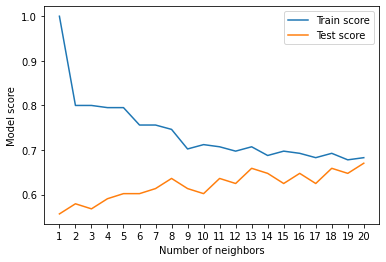

In [43]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum score on the test data: {max(test_scores)*100:.2f}%")

From the graph, we can see that k= 13 gives the best performance. 

Even after doing this, our KNN model's performance didn't get close to our Logistic and Random Forest performance.

Hence we will now tune the other two models. 

## Using RandomizedSearchCV  

'RandomizedSearchCV' tries different combinations of parameters, evaluates them and then saves the ones that perform the best.

Let's create a hyperparameter grid for each and then test them out.

In [44]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now let's use `RandomizedSearchCV` to try and tune our `LogisticRegression` model.

We'll pass it the different hyperparameters from `log_reg_grid` as well as set `n_iter = 20`. This means, `RandomizedSearchCV` will try 20 different combinations of hyperparameters from `log_reg_grid` and save the best ones.

In [45]:
# Setup random seed
np.random.seed(100)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [46]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [47]:
rs_log_reg.score(X_test, y_test)

0.8522727272727273

Now we've tuned `LogisticRegression` using `RandomizedSearchCV`, we'll do the same for `RandomForestClassifier`.

In [48]:
# Setup random seed
np.random.seed(100)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [49]:
# Finding the best parameters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_depth': 10}

In [50]:
# Evaluate the randomized search random forest model
rs_rf.score(X_test, y_test)

0.8295454545454546

Since logistic regression is still giving us better performance, we will tune it further, this time using 'GridSearchCV'

But since Logistic Regression is pulling out in front, we'll try tuning it further with GridSearchCV.

The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing 'n_iter' combinations, GridSearchCV will test every single possible combination.

In short:

RandomizedSearchCV - tries 'n_iter' combinations of hyperparameters and saves the best.

GridSearchCV - tries every single combination of hyperparameters and saves the best.


### Tuning a model with GridSearchCV

The difference between 'RandomizedSearchCV' and 'GridSearchCV' is where 'RandomizedSearchCV' searches over a grid of hyperparameters performing 'n_iter' combinations, 'GridSearchCV' will test every single possible combination.

RandomizedSearchCV -> tries 'n_iter' combinations of hyperparameters and saves the best.
GridSearchCV -> tries every single combination of hyperparameters and saves the best.

In [51]:
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [52]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [53]:
# Evaluate the model
gs_log_reg.score(X_test, y_test)

0.8522727272727273

We see that the results have improved.
If there are a large number of hyperparameters to tune, 'GridSearchCV' can take a long time to run. Hence it is better to first try 'RandomizedSearchCV' and then use grid search to improve further.

## Evaluating our Classification Model

We will now use our model to make predictions on the test data and get our metrics.

In [54]:
# Making predictions on test data
y_preds = gs_log_reg.predict(X_test)

In [55]:
# View predictions
y_preds

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [56]:
y_test

137    1
224    0
232    0
29     1
124    1
      ..
231    0
31     1
295    0
132    1
3      1
Name: target, Length: 88, dtype: int64

### ROC Curve and AUC Scores

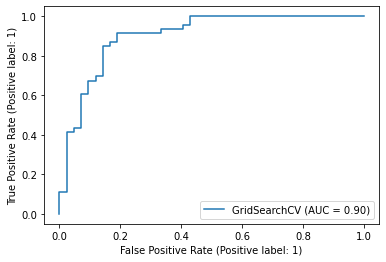

In [57]:
from sklearn.metrics import RocCurveDisplay 

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=y_test); 

Let us now get the confusion matrix.

### Confusion Matrix 

In [58]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[34  8]
 [ 5 41]]


Let us make the confusion matrix more visually appealing.

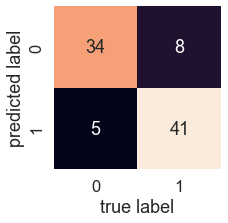

In [59]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

### Classification Report

A classification report will give us information of the precision and recall of our model for each class. We will have to pass it our test data labels and our predicted labels.

In [60]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84        42
           1       0.84      0.89      0.86        46

    accuracy                           0.85        88
   macro avg       0.85      0.85      0.85        88
weighted avg       0.85      0.85      0.85        88



This is what the terms in the report tell us: 

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
Support - The number of samples each metric was calculated on.

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.

Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. 
Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

However, all these values were calculated using a single training and test set. We can make them more reliable by using cross-validation.

In [61]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [62]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best parameters
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

Let us calculate cross-validated metrics.

In [63]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.83050847, 0.89830508, 0.89830508, 0.87931034, 0.74137931])

Since there are 5 metrics here, we'll take the average.

In [64]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8495616598480421

For other classification metrics ->

In [65]:
# Precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.8258542283310085

In [66]:
# Recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.925

In [67]:
# F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8719158915501148

Let's visualize them.

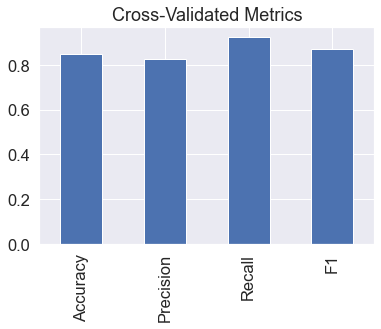

In [68]:
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Feature importance

Since we're using Logistic Regression, let us calculate feature importance for it.
We can access the 'coef_' attribute after we've fit an instance of our model.

In [69]:
# Fit model
clf.fit(X_train, y_train);

In [70]:
# Display coef_
clf.coef_

array([[ 0.00879504,  0.80074791, -0.01768635, -0.00101026, -0.05125088,
         0.49879902,  0.02300286, -0.66967904, -0.72040318,  0.43486994,
        -0.63379723, -0.46561609, -0.72053599]])

These numerical values indicate how much each feature contributes to our target variable. We can add our attributes along side it to make it more understandable.

In [71]:
# Match features to columns
features_dict = dict(zip(X.columns, list(clf.coef_[0])))
features_dict

{'age': 0.008795043935378314,
 'cp': 0.8007479079015681,
 'trestbps': -0.017686353808364804,
 'chol': -0.0010102602651327305,
 'fbs': -0.05125088243158233,
 'restecg': 0.4987990193348898,
 'thalach': 0.023002862204724337,
 'exang': -0.6696790419404018,
 'oldpeak': -0.7204031830673008,
 'slope': 0.4348699394535397,
 'ca': -0.6337972342292981,
 'thal': -0.46561608790408177,
 'sex': -0.7205359862087352}

Let us create a visualization. 

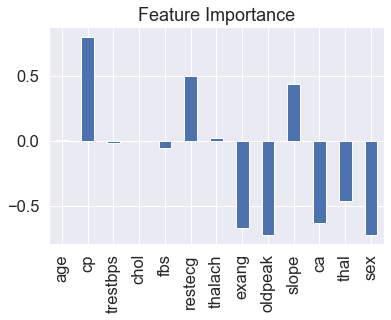

In [72]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

The larger the value (bigger bar), the more the feature contributes to the models decision.
If the value is negative, it means there's a negative correlation. And vice versa for positive values. 

For example, the 'sex' attribute has a negative value of -0.904, which means as the value for 'sex' increases, the 'target' value decreases. We can see this by comparing the 'sex' column to the 'target' column.

In [73]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,23,68
1,110,92


You can see, when 'sex' is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease ('target' = 1) than without.

And then as 'sex' increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

Looking at these figures and this specific dataset, it shows that if the patient is female, they're more likely to have heart disease.

Let us look at an attribute with a positive correlation.

In [74]:
# slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,88,48
2,33,103


Looking back the data dictionary, we see 'slope' is the "slope of the peak exercise ST segment" where:

0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
    
According to the model, there's a positive correlation of 0.470, not as strong as 'sex' and target' but still more than 0. This positive correlation means our model is picking up the pattern that as 'slope' increases, so does the 'target' value.